In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.spatial import distance
import math
import pandas as pd
import os
import sys

from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel
from sklearn.gaussian_process import GaussianProcessRegressor

%matplotlib inline

In [2]:
#data
#read csv data
y = pd.read_csv('data/data_germ.csv', index_col=0)



#8h
y_8h = y.loc['8h'].values
x_8h = np.full((y_8h.size,1), 8) 
#10h
y_10h = y.loc['10h'].values
x_10h = np.full((y_10h.size,1), 10) 
#12h
y_12h = y.loc['12h'].values
x_12h = np.full((y_12h.size,1), 12) 
#14h
y_14h = y.loc['14h'].values
x_14h = np.full((y_14h.size,1), 14) 
#15h
y_15h = y.loc['15h'].values
x_15h = np.full((y_15h.size,1), 15) 
#16h
y_16h = y.loc['16h'].values
x_16h = np.full((y_16h.size,1), 16) 
#17h
y_17h = y.loc['17h'].values
x_17h = np.full((y_17h.size,1), 17) 
#18h
y_18h = y.loc['18h'].values
x_18h = np.full((y_18h.size,1), 18) 
#19h
y_19h = y.loc['19h'].values
x_19h = np.full((y_19h.size,1), 19) 
#21h
y_21h = y.loc['21h'].values
x_21h = np.full((y_21h.size,1), 21) 
#23h
y_23h = y.loc['23h'].values
x_23h = np.full((y_23h.size,1), 23) 

In [3]:
%who

ConstantKernel	 GaussianProcessRegressor	 RBF	 WhiteKernel	 distance	 math	 norm	 np	 os	 
pd	 plt	 sys	 x_10h	 x_12h	 x_14h	 x_15h	 x_16h	 x_17h	 
x_18h	 x_19h	 x_21h	 x_23h	 x_8h	 y	 y_10h	 y_12h	 y_14h	 
y_15h	 y_16h	 y_17h	 y_18h	 y_19h	 y_21h	 y_23h	 y_8h	 


(array([2., 3., 4., 6., 7., 7., 6., 4., 3., 2.]),
 array([ 55.69051759,  65.25230781,  74.81409803,  84.37588825,
         93.93767847, 103.49946869, 113.06125892, 122.62304914,
        132.18483936, 141.74662958, 151.3084198 ]),
 <a list of 10 Patch objects>)

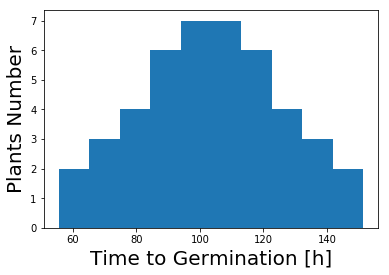

In [4]:
plt.xlabel('Time to Germination [h]',fontsize=20)
plt.ylabel('Plants Number',fontsize=20)
plt.hist(y_19h, bins=10)

In [5]:
def accui(mean, vari):
    k = -1.0
    return mean + k * vari

In [6]:
def normalize(y):#平均0，標準偏差1となるようにデータを正規化
    return (y - np.mean(y)) / np.std(y), np.mean(y), np.std(y)

def plot(X, y, epoch, color,data):
    print('Epoch = ' + str(epoch))
    length_scale = 1.55
    kernel = RBF(length_scale = length_scale, length_scale_bounds = (length_scale,length_scale))# + WhiteKernel(0.5,(0.1, 1))
    gp = GaussianProcessRegressor(kernel = kernel, normalize_y=True, n_restarts_optimizer=1)# , alpha = 0)
    
    y, mean_y, std_y = normalize(y)#正規化
    
    gp.fit(X, y) # / y_scale)
    print(gp.kernel_)

    x = np.atleast_2d(np.linspace(8, 23, 1000)).T
    y_pred, sigma = gp.predict(x, return_std=True)
    y_pred = std_y * y_pred + mean_y
    sigma *= std_y
    
    a = accui(y_pred,sigma)
    next_index = a.argmin()
    print('next is ' + str(int(x[next_index][0])))

    fig, ax = plt.subplots()
    #ax.plot(X, y, color+'.', markersize=10, label='Observations')
    ax.errorbar(data[:,0], data[:,1],data[:,2], fmt='r.', markersize=10, label=u'Observations')
    ax.plot(x, y_pred, 'b-', label='Prediction')
    ax.fill(
        np.concatenate([x, x[::-1]]),
        np.concatenate([y_pred - 1.96 * sigma, (y_pred + 1.96 * sigma)[::-1]]),
        alpha=.5,
        fc='b',
        ec='None',
        label='95% confidence interval')
    ax.set_xlabel('Day Duration [hours/day]',fontsize=20)
    ax.set_ylabel('Time to Germination [h]',fontsize=20)
    ax.legend(loc='upper right', fontsize=12)
    plt.savefig('growth_rate.png', bbox_inches='tight')
    fig, bx = plt.subplots()
    bx.plot(x,a,'g',label='Accuisition Function')
    bx.plot(x[next_index],y_pred[next_index],'r')
    bx.set_xlabel('$Day Duration$')
    bx.set_ylabel('$Utility$')
    bx.legend(loc='upper left')
    

Epoch = 0
RBF(length_scale=1.55)
next is 15


/usr/local/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


finish training


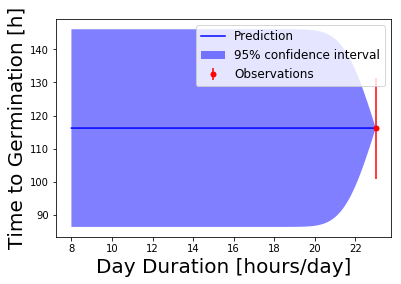

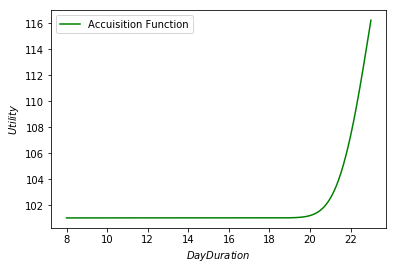

In [7]:
##TrainGP
x_train = x_23h
y_train = y_23h
data =np.array([[23,np.mean(y_23h),np.std(y_23h)]])

plot(x_train, y_train,0,'g',data)

print("finish training")

In [8]:
##BayesianOpt
x_array = x_train
y_array = y_train
N=0

Epoch = 1
RBF(length_scale=1.55)
next is 20


/usr/local/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


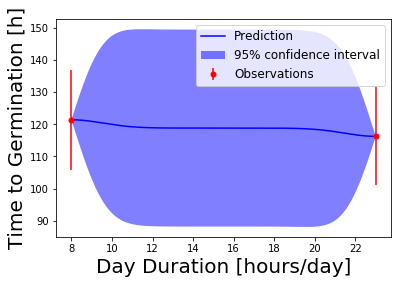

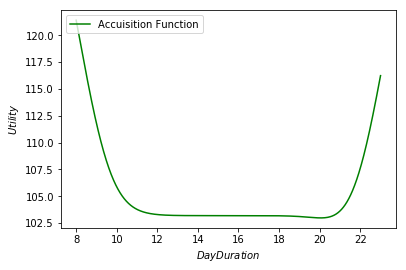

In [9]:
#8h
x_array = np.vstack((x_array,x_8h))
y_array = np.append(y_array, y_8h)
data = np.append(data,[[8,np.mean(y_8h),np.std(y_8h)]],axis=0)
N+=1
plot(x_array, y_array,N,'g',data)

Epoch = 2
RBF(length_scale=1.55)
next is 17


/usr/local/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


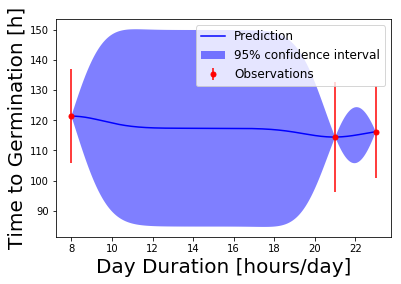

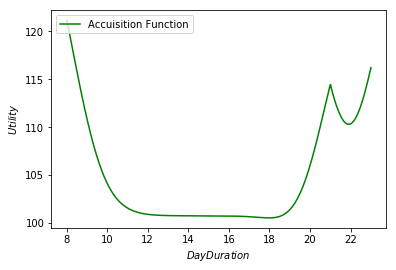

In [10]:
x_array = np.vstack((x_array,x_21h))
y_array = np.append(y_array, y_21h)
data = np.append(data,[[21,np.mean(y_21h),np.std(y_21h)]],axis=0)
N+=1
plot(x_array, y_array,N,'g',data)

Epoch = 3
RBF(length_scale=1.55)
next is 15


/usr/local/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


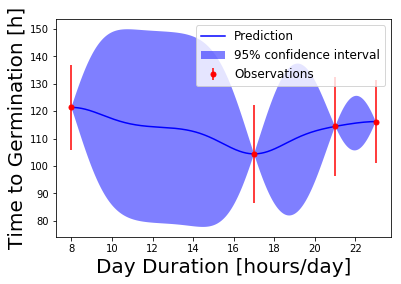

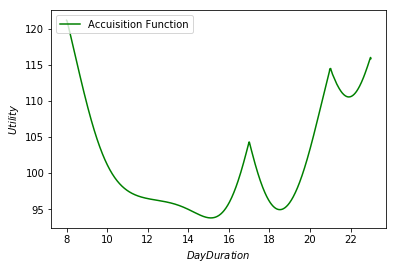

In [11]:
x_array = np.vstack((x_array,x_17h))
y_array = np.append(y_array, y_17h)
data = np.append(data,[[17,np.mean(y_17h),np.std(y_17h)]],axis=0)
N+=1
plot(x_array, y_array,N,'g',data)

Epoch = 4
RBF(length_scale=1.55)
next is 18


/usr/local/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


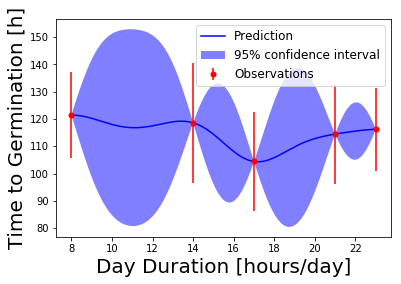

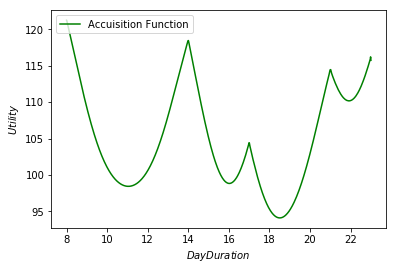

In [12]:
x_array = np.vstack((x_array,x_14h))
y_array = np.append(y_array,y_14h)
data = np.append(data,[[14,np.mean(y_14h),np.std(y_14h)]],axis=0)
N+=1
plot(x_array, y_array,N,'g',data)

Epoch = 5
RBF(length_scale=1.55)
next is 19


/usr/local/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


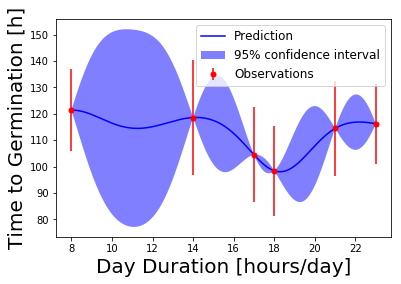

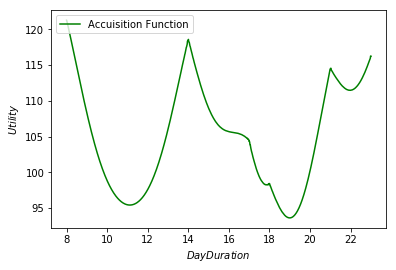

In [13]:
x_array = np.vstack((x_array,x_18h))
y_array = np.append(y_array, y_18h)
data = np.append(data,[[18,np.mean(y_18h),np.std(y_18h)]],axis=0)
N+=1
plot(x_array, y_array,N,'g',data)

Epoch = 6
RBF(length_scale=1.55)
next is 11


/usr/local/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


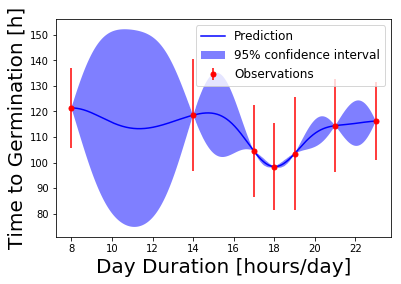

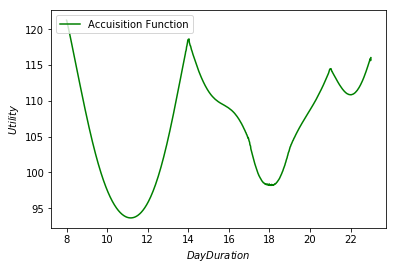

In [14]:
x_array = np.vstack((x_array,x_19h))
y_array = np.append(y_array, y_19h)
data = np.append(data,[[19,np.mean(y_19h),np.std(y_19h)]],axis=0)
N+=1
plot(x_array, y_array,N,'g',data)

Epoch = 7
RBF(length_scale=1.55)
next is 10


/usr/local/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


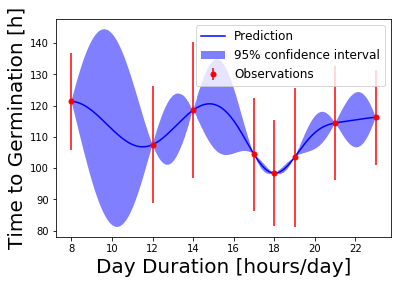

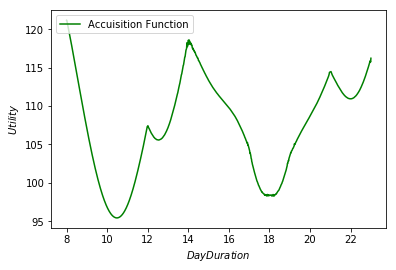

In [15]:
x_array = np.vstack((x_array,x_12h))
y_array = np.append(y_array, y_12h)
data = np.append(data,[[12,np.mean(y_12h),np.std(y_12h)]],axis=0)
N+=1
plot(x_array, y_array,N,'g',data)

Epoch = 8
RBF(length_scale=1.55)
next is 17


/usr/local/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


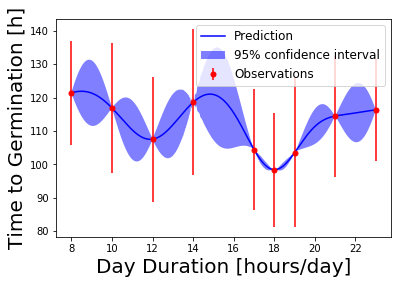

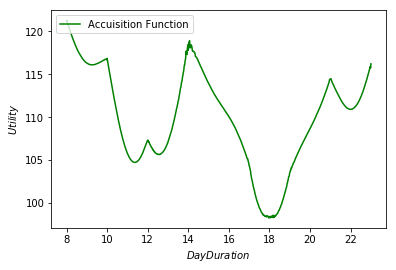

In [16]:
x_array = np.vstack((x_array,x_10h))
y_array = np.append(y_array, y_10h)
data = np.append(data,[[10,np.mean(y_10h),np.std(y_10h)]],axis=0)
N+=1
plot(x_array, y_array,N,'g',data)

Epoch = 8
RBF(length_scale=1.55)
next is 18


/usr/local/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


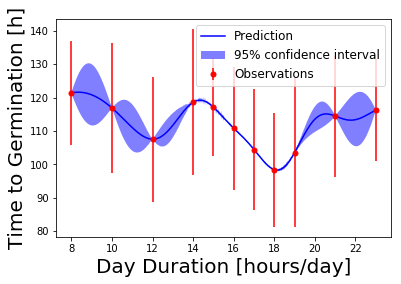

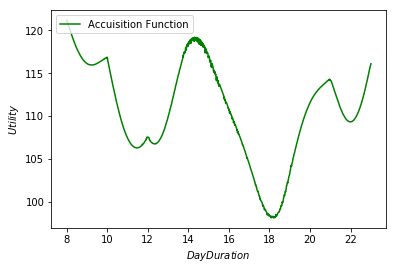

In [17]:
#gaussian process by all data
y_all = np.append(y_8h,y_10h)
y_all = np.append(y_all,y_12h)
y_all = np.append(y_all,y_14h)
y_all = np.append(y_all,y_15h)
y_all = np.append(y_all,y_16h)
y_all = np.append(y_all,y_17h)
y_all = np.append(y_all,y_18h)
y_all = np.append(y_all,y_19h)
y_all = np.append(y_all,y_21h)
y_all = np.append(y_all,y_23h)

x_all = np.vstack((x_8h,x_10h))
x_all = np.vstack((x_all,x_12h))
x_all = np.vstack((x_all,x_14h))
x_all = np.vstack((x_all,x_15h))
x_all = np.vstack((x_all,x_16h))
x_all = np.vstack((x_all,x_17h))
x_all = np.vstack((x_all,x_18h))
x_all = np.vstack((x_all,x_19h))
x_all = np.vstack((x_all,x_21h))
x_all = np.vstack((x_all,x_23h))

data_all =np.array([[8,np.mean(y_8h),np.std(y_8h)]])
data_all = np.append(data_all,[[10,np.mean(y_10h),np.std(y_10h)]],axis=0)
data_all = np.append(data_all,[[12,np.mean(y_12h),np.std(y_12h)]],axis=0)
data_all = np.append(data_all,[[14,np.mean(y_14h),np.std(y_14h)]],axis=0)
data_all = np.append(data_all,[[15,np.mean(y_15h),np.std(y_15h)]],axis=0)
data_all = np.append(data_all,[[16,np.mean(y_16h),np.std(y_16h)]],axis=0)
data_all = np.append(data_all,[[17,np.mean(y_17h),np.std(y_17h)]],axis=0)
data_all = np.append(data_all,[[18,np.mean(y_18h),np.std(y_18h)]],axis=0)
data_all = np.append(data_all,[[19,np.mean(y_19h),np.std(y_19h)]],axis=0)
data_all = np.append(data_all,[[21,np.mean(y_21h),np.std(y_21h)]],axis=0)
data_all = np.append(data_all,[[23,np.mean(y_23h),np.std(y_23h)]],axis=0)

plot(x_all, y_all,N,'g',data_all)

In [18]:
print(data_all)

[[  8.         121.39357025  15.60393409]
 [ 10.         116.85011341  19.59843212]
 [ 12.         107.52708286  18.76337815]
 [ 14.         118.56936073  21.87301325]
 [ 15.         117.10426112  14.69537936]
 [ 16.         110.82280413  18.39094638]
 [ 17.         104.41962433  18.00439319]
 [ 18.          98.40131259  17.0683301 ]
 [ 19.         103.49946869  22.24708317]
 [ 21.         114.45448779  18.11710051]
 [ 23.         116.23341223  15.20767209]]
